In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tadgan import tadgan, telemanom
%matplotlib inline

# preprocess

In [2]:
train_csv = 'processed_train_E1.csv'
src_file = 'telemanom/data/test/E-1.npy'

In [3]:
label_df = pd.read_csv('telemanom/labeled_anomalies.csv')

In [4]:
label_df

,chan_id,spacecraft,anomaly_sequences,class,num_values
0,P-1,SMAP,"[[2149, 2349], [4536, 4844], [3539, 3779]]","[contextual, contextual, contextual]",8505
1,S-1,SMAP,"[[5300, 5747]]",[point],7331
2,E-1,SMAP,"[[5000, 5030], [5610, 6086]]","[contextual, contextual]",8516
3,E-2,SMAP,"[[5598, 6995]]",[point],8532
4,E-3,SMAP,"[[5094, 8306]]",[point],8307
...,...,...,...,...,...
77,P-11,MSL,"[[1778, 1898], [1238, 1344]]","[point, point]",3535
78,D-15,MSL,"[[1500, 2140]]",[point],2158
79,D-16,MSL,"[[600, 1250]]",[contextual],2191
80,M-7,MSL,"[[940, 1040]]",[point],2156


In [5]:
anomaly_sequences = eval(label_df[label_df['chan_id'] == 'E-1']['anomaly_sequences'].item())

In [6]:
train_size = sorted(anomaly_sequences, key=lambda x: x[0])[0][0]

In [8]:
telemanom.process(src_file, train_csv, train_range=train_size)

# train

In [10]:
train_dataset = telemanom.TelemanomDataset(train_csv)
tadgan.set_seed()
gan = tadgan.TadGAN(train_dataset)

In [11]:
(cx_loss, cz_loss, g_loss) = gan.train(num_epoch=100,debug=True)

Epoch: 1/100, [Cx loss: -9.242594835005308] [Cz loss: 1.141264215896004] [G loss: 792.9455607096354]
Epoch: 2/100, [Cx loss: -13.351006947065654] [Cz loss: -1.9533601293438358] [G loss: 770.4629801432292]
Epoch: 3/100, [Cx loss: -12.384290306191696] [Cz loss: -6.567591513458051] [G loss: 679.359541829427]
Epoch: 4/100, [Cx loss: -12.144719010905215] [Cz loss: -7.175031906680057] [G loss: 652.1385091145834]
Epoch: 5/100, [Cx loss: -11.898612549430446] [Cz loss: -6.1270836027044995] [G loss: 645.3824788411458]
Epoch: 6/100, [Cx loss: -11.73017222002933] [Cz loss: -5.041205048561096] [G loss: 641.3326619466146]
Epoch: 7/100, [Cx loss: -11.437925351293464] [Cz loss: -4.11227337937606] [G loss: 635.3251668294271]
Epoch: 8/100, [Cx loss: -10.920100262290553] [Cz loss: -3.5881912174977755] [G loss: 615.334619140625]
Epoch: 9/100, [Cx loss: -10.584928035736084] [Cz loss: -4.693521995293467] [G loss: 590.0843627929687]
Epoch: 10/100, [Cx loss: -10.41159116594415] [Cz loss: -4.650155308999513] [

Epoch: 81/100, [Cx loss: -7.598104539670442] [Cz loss: -4.70070931785985] [G loss: 179.1651814778646]
Epoch: 82/100, [Cx loss: -7.586999918285169] [Cz loss: -4.652431180602626] [G loss: 178.5717753092448]
Epoch: 83/100, [Cx loss: -7.614271295698066] [Cz loss: -4.594192391947696] [G loss: 176.50274454752605]
Epoch: 84/100, [Cx loss: -7.552054198164689] [Cz loss: -4.5936729657022575] [G loss: 175.0705556233724]
Epoch: 85/100, [Cx loss: -7.508123956228557] [Cz loss: -4.533773252838536] [G loss: 174.30458374023436]
Epoch: 86/100, [Cx loss: -7.551783800125122] [Cz loss: -4.525859202209272] [G loss: 176.20757548014322]
Epoch: 87/100, [Cx loss: -7.474145130107277] [Cz loss: -4.487964840311753] [G loss: 172.23664143880208]
Epoch: 88/100, [Cx loss: -7.567953831271121] [Cz loss: -4.453601466981988] [G loss: 171.0909413655599]
Epoch: 89/100, [Cx loss: -7.457548913202788] [Cz loss: -4.5016650181067615] [G loss: 171.68846232096354]
Epoch: 90/100, [Cx loss: -7.44520714408473] [Cz loss: -4.4272319329

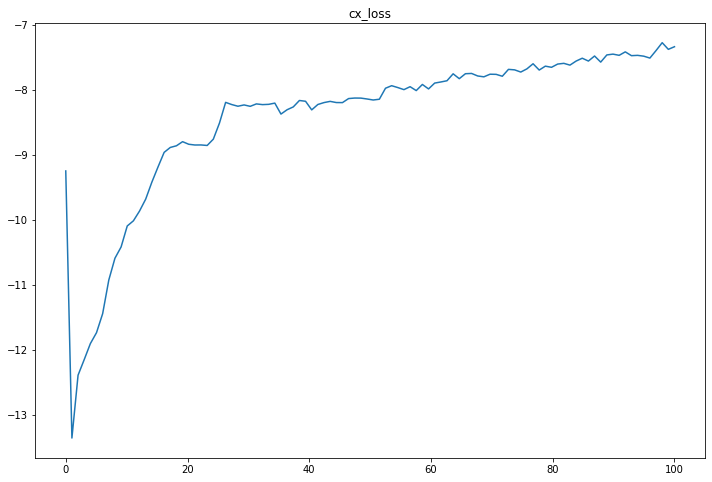

In [12]:
values = cx_loss
title = 'cx_loss'
start = 0
end = values.shape[0]

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax.set_title(title)
x = np.linspace(start, end, end - start)
ax.plot(x,values[start:end])
plt.show()

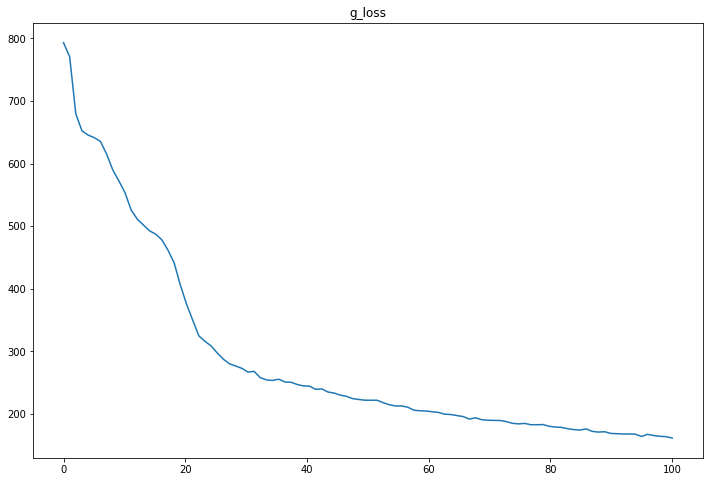

In [13]:
values = g_loss
title = 'g_loss'
start = 0
end = values.shape[0]

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax.set_title(title)
x = np.linspace(start, end, end - start)
ax.plot(x,values[start:end])
plt.show()

In [14]:
raw = gan.raw
reconstructed = gan.reconstruct(raw)

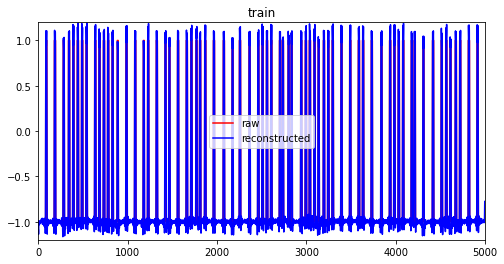

In [15]:
start = 0
end = raw.shape[0]
title = 'train'

fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
x = np.linspace(start, end, end - start)
ax.set_title(title)
for [anomaly_start, anomaly_end] in anomaly_sequences:
    ax.axvspan(anomaly_start, anomaly_end, color='gray', alpha=0.25)
ax.plot(raw, 'r', label='raw')
ax.plot(reconstructed, 'b', label='reconstructed')
plt.xlim(start, end)
plt.ylim(-1.2, 1.2)
ax.legend()
plt.show()

# test

In [16]:
left_edge = int(train_size*0.8)
test_values =np.load(src_file)[left_edge:-1,0].reshape(-1, 1)
test_reconstructed = gan.reconstruct(test_values)

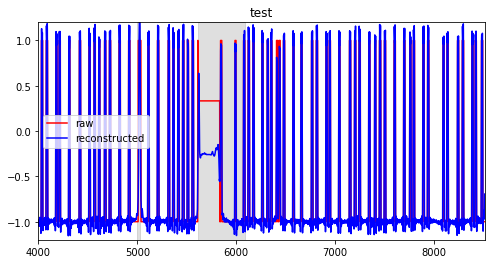

In [17]:
title = 'test'
start = left_edge
end = left_edge + test_values.shape[0]

fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
ax.set_title(title)
x = np.linspace(start, end - 1, test_values.shape[0])

for [anomaly_start, anomaly_end] in anomaly_sequences:
    ax.axvspan(anomaly_start, anomaly_end, color='gray', alpha=0.25)
ax.plot(x, test_values, 'r', label='raw')
ax.plot(x, test_reconstructed, 'b', label='reconstructed')
plt.xlim(start, end)
plt.ylim(-1.2, 1.2)
ax.legend()
plt.show()

In [ ]:
anomaly_score1 = gan.anomaly_score(test_values, test_reconstructed, distance='point', alpha=1)

In [ ]:
values = anomaly_score1
title = 'distance=point'
start = left_edge
end = left_edge + test_values.shape[0]

fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
ax.set_title(title)
x = np.linspace(start, end - 1, test_values.shape[0])
for [anomaly_start, anomaly_end] in anomaly_sequences:
    ax.axvspan(anomaly_start, anomaly_end, color='gray', alpha=0.25)
ax.plot(x, values, 'b', label='reconstructed')
plt.xlim(start, end)
plt.ylim(bottom=0)
ax.legend()
plt.show()

In [ ]:
anomaly_score2 = gan.anomaly_score(test_values, test_reconstructed, distance='dtw', combination=None, score_window=10)

In [ ]:
values = anomaly_score2
title = 'distance=dtw, score_window=10'
start = left_edge
end = left_edge + test_values.shape[0]

fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
ax.set_title(title)
x = np.linspace(start, end - 1, test_values.shape[0])
for [anomaly_start, anomaly_end] in anomaly_sequences:
    ax.axvspan(anomaly_start, anomaly_end, color='gray', alpha=0.25)
ax.plot(x, values, 'b', label='reconstructed')
plt.xlim(start, end)
plt.ylim(bottom=0)
ax.legend()
plt.show()

In [ ]:
anomaly_score3 = gan.anomaly_score(test_values, test_reconstructed, distance='point', alpha=0)

In [ ]:
values = anomaly_score3
title = 'alpha=0'
start = left_edge
end = left_edge + test_values.shape[0]

fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
ax.set_title(title)
x = np.linspace(start, end - 1, test_values.shape[0])
for [anomaly_start, anomaly_end] in anomaly_sequences:
    ax.axvspan(anomaly_start, anomaly_end, color='gray', alpha=0.25)
ax.plot(x, values, 'b', label='reconstructed')
plt.xlim(start, end)
plt.ylim(bottom=0)
ax.legend()
plt.show()

In [18]:
anomaly_score4 = gan.anomaly_score(test_values, test_reconstructed, distance='dtw', alpha=0.5)

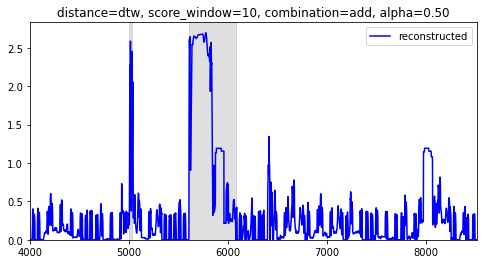

In [19]:
values = anomaly_score4
title = 'distance=dtw, score_window=10, combination=add, alpha=0.50'
start = left_edge
end = left_edge + test_values.shape[0]

fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
ax.set_title(title)
x = np.linspace(start, end - 1, test_values.shape[0])
for [anomaly_start, anomaly_end] in anomaly_sequences:
    ax.axvspan(anomaly_start, anomaly_end, color='gray', alpha=0.25)
ax.plot(x, values, 'b', label='reconstructed')
plt.xlim(start, end)
plt.ylim(bottom=0)
ax.legend()
plt.show()